In [19]:
from tensorflow import keras
import matplotlib.pyplot as plt


In [20]:
modelo = keras.models.Sequential()
modelo.add(keras.layers.Conv2D(8,5,(1,1),activation='relu',input_shape=(32,32,3)))
modelo.add(keras.layers.MaxPooling2D((2,2),(2,2)))
modelo.add(keras.layers.Conv2D(16,5,(1,1),activation='relu'))
modelo.add(keras.layers.MaxPooling2D((2,2),(2,2)))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(120,activation= 'relu'))
modelo.add(keras.layers.Dense(84,activation= 'relu'))
modelo.add(keras.layers.Dense(10,activation= 'softmax'))

modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 8)         608       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        3216      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [21]:
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK

In [22]:
entrada = LK.Input(shape=(28,28,1))
conv1 = LK.Conv2D(6,5,padding='same',activation = 'relu')(entrada)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)
conv2 = LK.Conv2D(16,5,padding='valid', activation = 'relu')(pool1)
pool2 = LK.MaxPool2D((2,2),(2,2))(conv2)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120,activation='relu')(flat)
fc2 = LK.Dense(84,activation='relu')(fc1)
salida = LK.Dense(10,activation='sigmoid')(fc2)
lenet = MK.Model(entrada,salida)

lenet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 400)               0   

In [23]:
mnist = keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [24]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


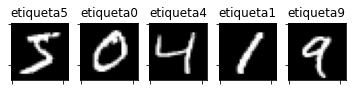

In [25]:
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.gca().set_yticklabels([])
  plt.gca().set_xticklabels([])
  plt.gca().set_title('etiqueta' + str(y_train[i]))
  plt.imshow(x_train[i],cmap='gray')
plt.show()

In [26]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [27]:
lenet.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'] )

In [30]:
history = lenet.fit(x_train,y_train,epochs=7,batch_size=128, validation_data=(x_test,y_test),verbose=1)
loss,acc = lenet.evaluate(x_test,y_test,verbose=1)
print(loss, acc)

Epoch 1/7
469/469 [==============================] - 40s 85ms/step - loss: 0.0265 - accuracy: 0.9911 - val_loss: 0.0624 - val_accuracy: 0.9822
Epoch 2/7
469/469 [==============================] - 43s 91ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0572 - val_accuracy: 0.9846
Epoch 3/7
469/469 [==============================] - 40s 85ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0601 - val_accuracy: 0.9854
Epoch 4/7
469/469 [==============================] - 40s 85ms/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0581 - val_accuracy: 0.9860
Epoch 5/7
469/469 [==============================] - 40s 85ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0627 - val_accuracy: 0.9853
Epoch 6/7
469/469 [==============================] - 40s 84ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0728 - val_accuracy: 0.9833
Epoch 7/7
313/313 [==============================] - 4s 14ms/step - loss: 0.0653 - accuracy: 0.9860
0.06527586281299591 0.9860000014305115


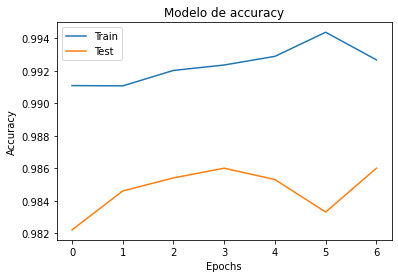

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

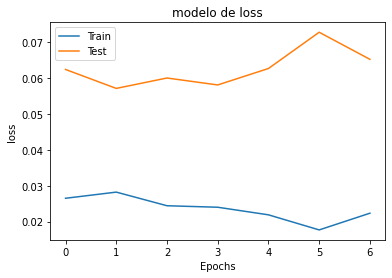

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo de loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

In [35]:
lenet.save('modelo.h5')

In [36]:
from keras.models import load_model
modelito = load_model('modelo.h5')

In [37]:
predicciones = modelito.predict(x_test)

313/313 [==============================] - 4s 13ms/step


In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report

In [39]:
cm = confusion_matrix(y_test,predicciones.argmax(1))

In [40]:
print(cm)

[[ 975    0    0    0    0    0    2    1    1    1]
 [   0 1127    1    0    0    1    5    1    0    0]
 [   3   16 1008    0    2    0    1    0    2    0]
 [   0    1   20  986    0    0    0    1    1    1]
 [   0   10    1    0  956    0    5    3    0    7]
 [   2    0    0   32    1  846    2    1    4    4]
 [   4    2    0    1    1    0  948    0    2    0]
 [   0    8   17    0    1    0    0  996    1    5]
 [   1    0   10    2    1    0    1    1  953    5]
 [   0    5    0    0   79    1    0   10    2  912]]


In [42]:
labels=['cero','uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve']

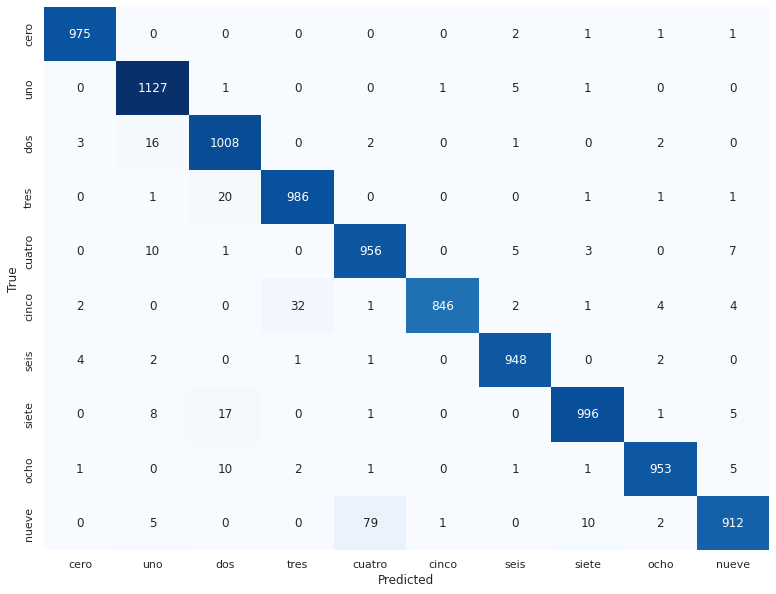

In [47]:
plt.figure(figsize=(130,10))
sns.heatmap(cm,cbar=False,xticklabels=labels,yticklabels=labels,fmt='d',annot=True,cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [48]:
print(classification_report(y_test,predicciones.argmax(1),target_names=labels))

              precision    recall  f1-score   support

        cero       0.99      0.99      0.99       980
         uno       0.96      0.99      0.98      1135
         dos       0.95      0.98      0.97      1032
        tres       0.97      0.98      0.97      1010
      cuatro       0.92      0.97      0.95       982
       cinco       1.00      0.95      0.97       892
        seis       0.98      0.99      0.99       958
       siete       0.98      0.97      0.98      1028
        ocho       0.99      0.98      0.98       974
       nueve       0.98      0.90      0.94      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [49]:
entrada = LK.Input(shape=(28,28,1))
conv1 = LK.Conv2D(6,5,padding='same',activation = 'relu')(entrada)
pool1 = LK.MaxPool2D((2,2),(2,2))(conv1)
conv2 = LK.Conv2D(16,5,padding='valid', activation = 'relu')(pool1)
drop = LK.Dropout(0.25)(conv2)
pool2 = LK.MaxPool2D((2,2),(2,2))(drop)
flat = LK.Flatten()(pool2)
fc1 = LK.Dense(120,activation='relu')(flat)
fc2 = LK.Dense(84,activation='relu')(fc1)
salida = LK.Dense(10,activation='sigmoid')(fc2)
model_drop = MK.Model(entrada,salida)

model_drop.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 dropout (Dropout)           (None, 10, 10, 16)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                       

In [50]:
model_drop.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'] )

In [51]:
history = model_drop.fit(x_train,y_train,epochs=7,batch_size=128, validation_data=(x_test,y_test),verbose=1)
loss,acc = model_drop.evaluate(x_test,y_test,verbose=1)
print(loss, acc)

Epoch 1/7
469/469 [==============================] - 45s 90ms/step - loss: 1.1257 - accuracy: 0.8401 - val_loss: 0.1523 - val_accuracy: 0.9538
Epoch 2/7
469/469 [==============================] - 41s 88ms/step - loss: 0.1577 - accuracy: 0.9543 - val_loss: 0.0812 - val_accuracy: 0.9738
Epoch 3/7
469/469 [==============================] - 40s 86ms/step - loss: 0.0985 - accuracy: 0.9705 - val_loss: 0.0765 - val_accuracy: 0.9742
Epoch 4/7
469/469 [==============================] - 41s 86ms/step - loss: 0.0783 - accuracy: 0.9762 - val_loss: 0.0644 - val_accuracy: 0.9797
Epoch 5/7
469/469 [==============================] - 41s 87ms/step - loss: 0.0621 - accuracy: 0.9801 - val_loss: 0.0556 - val_accuracy: 0.9830
Epoch 6/7
469/469 [==============================] - 42s 90ms/step - loss: 0.0577 - accuracy: 0.9821 - val_loss: 0.0645 - val_accuracy: 0.9801
Epoch 7/7
313/313 [==============================] - 4s 13ms/step - loss: 0.0463 - accuracy: 0.9841
0.04626190662384033 0.9840999841690063


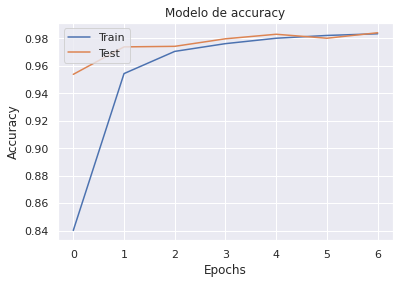

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

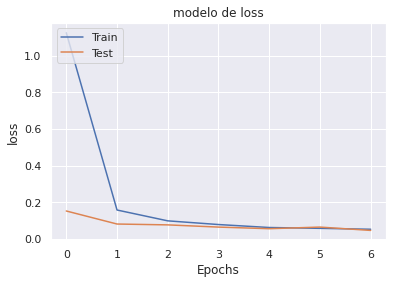

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo de loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()